In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets, models , layers 
from tensorflow.keras.layers import Conv2D , Dense , Flatten, Dropout , AvgPool2D , Activation 
import numpy as np 
import matplotlib.pyplot as plt 

Loading and Examining Data

In [2]:
(X_train , Y_train) , (x_test , y_test) = datasets.mnist.load_data()

In [3]:
print(X_train.shape)
print(x_test.shape)
print(Y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


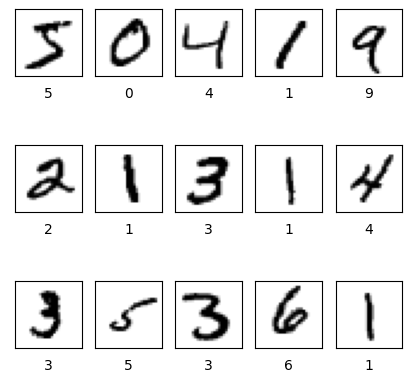

In [4]:
plt.figure(figsize=(5,5))
ncols = 5
nrows = 3
for i in range(ncols * nrows):
    plt.subplot(nrows,ncols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i],cmap = plt.cm.binary)
    plt.xlabel(Y_train[i])
plt.show()
    

In [5]:
#lenet takes as an input 32 x 32
#data needs to be adjusted
#X_train is a 4D array where the dimensions represent (num_samples, height, width, num_channels).
# #(0,0) for the first dimension means no padding is added before or after any of the images in the dataset.
#(2,2) for the second dimension means 2 rows of padding are added to the top and bottom of each image.
#(2,2) for the third dimension means 2 columns of padding are added to the left and right of each image.
#(0,0) for the fourth dimension means no padding is added to the channels of the images (for example, in an RGB image, this would mean not adding 
# any new color channels).
#leNet accepts 4D arrays
X_train = tf.pad(X_train, [[0, 0], [2, 2], [2, 2]], mode="constant")
x_test = tf.pad(x_test, [[0, 0], [2, 2], [2, 2]], mode="constant")
X_train = tf.expand_dims(X_train , axis = 3 , name = None)
x_test = tf.expand_dims(x_test , axis =3 , name = None)

print(X_train.shape)
print(x_test.shape)
 

(60000, 32, 32, 1)
(10000, 32, 32, 1)


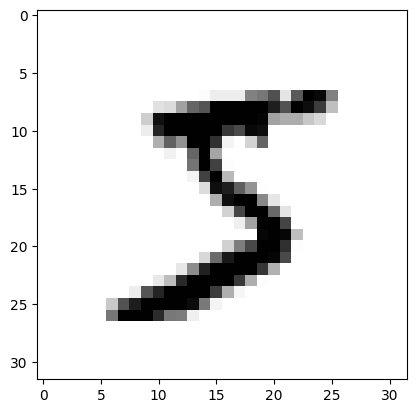

In [6]:
#visualization after padding
plt.imshow(X_train[0] , plt.cm.binary)

In [7]:
#normalize then shuffle the data
from sklearn.utils import shuffle
X_train = X_train / 255
x_test = x_test / 255

In [8]:
#creating validation set
x_val =  X_train[40000:]
y_val = Y_train[40000:]
x_train = X_train[:40000]
y_train = Y_train[:40000]
print(x_val.shape)
print(x_train.shape)
print(y_val.shape)

(20000, 32, 32, 1)
(40000, 32, 32, 1)
(20000,)


LeNet

In [9]:
model = models.Sequential()
model.add(Conv2D(6 , (5,5) , activation = 'tanh' , input_shape = x_train.shape[1:]))
model.add(AvgPool2D(2,2))
model.add(Activation('sigmoid'))
model.add(Conv2D(16 , (5,5) , activation = 'tanh'))
model.add(AvgPool2D(2,2))
model.add(Activation('sigmoid'))
model.add(Conv2D(120 , (5,5) , activation = 'tanh'))
model.add(Flatten())
model.add(Dense(84 , activation ='tanh'))
model.add(Dense(10 , activation = 'softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 activation (Activation)     (None, 14, 14, 6)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 activation_1 (Activation)   (None, 5, 5, 16)          0

In [10]:
model.compile( optimizer= 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [12]:
history = model.fit(x_train , y_train , validation_data=[x_val , y_val], batch_size = 64 , epochs = 20)

Epoch 1/20
625/625 [==============================] - 18s 29ms/step - loss: 0.2619 - accuracy: 0.9168 - val_loss: 0.2115 - val_accuracy: 0.9340
Epoch 2/20
625/625 [==============================] - 15s 25ms/step - loss: 0.2135 - accuracy: 0.9336 - val_loss: 0.1985 - val_accuracy: 0.9362
Epoch 3/20
625/625 [==============================] - 16s 26ms/step - loss: 0.1866 - accuracy: 0.9404 - val_loss: 0.1745 - val_accuracy: 0.9434
Epoch 4/20
625/625 [==============================] - 17s 27ms/step - loss: 0.1632 - accuracy: 0.9481 - val_loss: 0.1503 - val_accuracy: 0.9540
Epoch 5/20
625/625 [==============================] - 18s 28ms/step - loss: 0.1425 - accuracy: 0.9552 - val_loss: 0.1354 - val_accuracy: 0.9578
Epoch 6/20
625/625 [==============================] - 17s 28ms/step - loss: 0.1280 - accuracy: 0.9600 - val_loss: 0.1323 - val_accuracy: 0.9582
Epoch 7/20
625/625 [==============================] - 18s 28ms/step - loss: 0.1228 - accuracy: 0.9613 - val_loss: 0.1297 - val_accuracy:

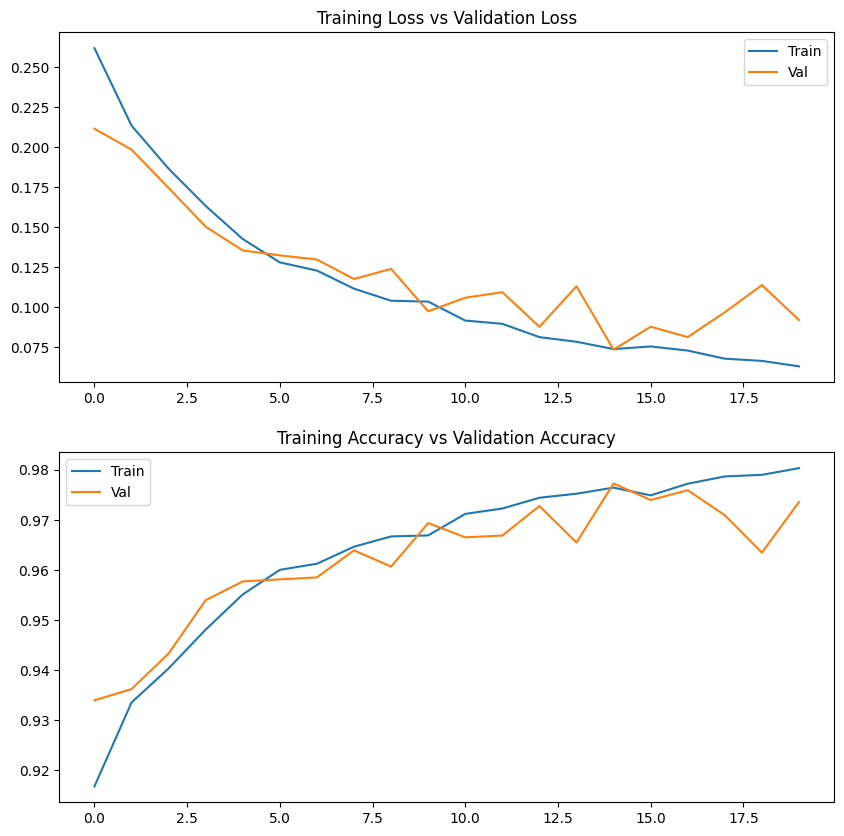

In [13]:
fig, axs = plt.subplots(2, 1, figsize=(10,10))  
axs[0].plot(history.history['loss']) 
axs[0].plot(history.history['val_loss']) 
axs[0].title.set_text('Training Loss vs Validation Loss') 
axs[0].legend(['Train', 'Val'])  
axs[1].plot(history.history['accuracy']) 
axs[1].plot(history.history['val_accuracy']) 
axs[1].title.set_text('Training Accuracy vs Validation Accuracy') 
axs[1].legend(['Train', 'Val'])

In [14]:
model.evaluate(x_test , y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0807 - accuracy: 0.9761


[0.08069325238466263, 0.9761000275611877]

1/1 [==============================] - 0s 25ms/step


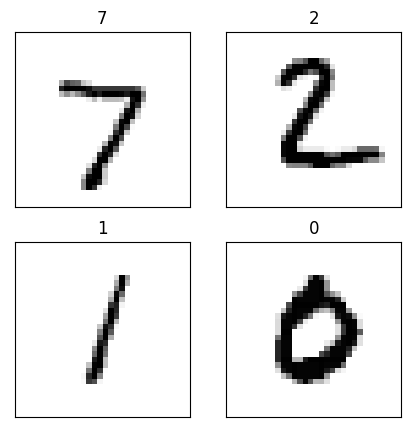

In [21]:
plt.figure(figsize=(5, 5))
nrows = 2
ncols = 2
for i in range(nrows * ncols):
    plt.subplot(nrows, ncols, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    
    # Get the predicted class label
    image = x_test[i][np.newaxis, ...]  # Reshape image
    prediction = model.predict(image)  # Predict image
    predicted_class = np.argmax(prediction)  # Get the predicted class
    plt.title(predicted_class)

plt.show()